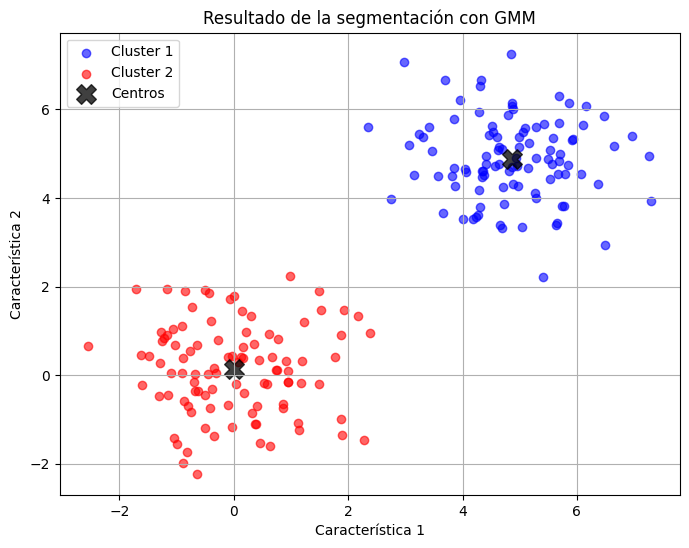

In [1]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 1. Generar datos simples
np.random.seed(0)  # Para reproducibilidad

# Crear dos grupos de datos (clusters)
cluster_1 = np.random.normal(0, 1, size=(100, 2))  # Cluster 1: centrado en (0, 0)
cluster_2 = np.random.normal(5, 1, size=(100, 2))  # Cluster 2: centrado en (5, 5)

# Combinar los dos clusters en un solo conjunto de datos
data = np.vstack([cluster_1, cluster_2])

# 2. Aplicar Gaussian Mixture Model (GMM) con Algoritmo EM
n_components = 2  # Número de clusters (en este caso, sabemos que son 2)
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)  # Entrenar el modelo

# 3. Predecir a qué cluster pertenece cada punto
labels = gmm.predict(data)  # Etiquetas de cluster para cada punto

# 4. Visualizar los resultados
plt.figure(figsize=(8, 6))

# Graficar los puntos de cada cluster con colores diferentes
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c='blue', label='Cluster 1', alpha=0.6)
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='red', label='Cluster 2', alpha=0.6)

# Graficar los centros de los clusters
centers = gmm.means_  # Obtener los centros de los clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centros')

plt.title("Resultado de la segmentación con GMM")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.grid()
plt.show()

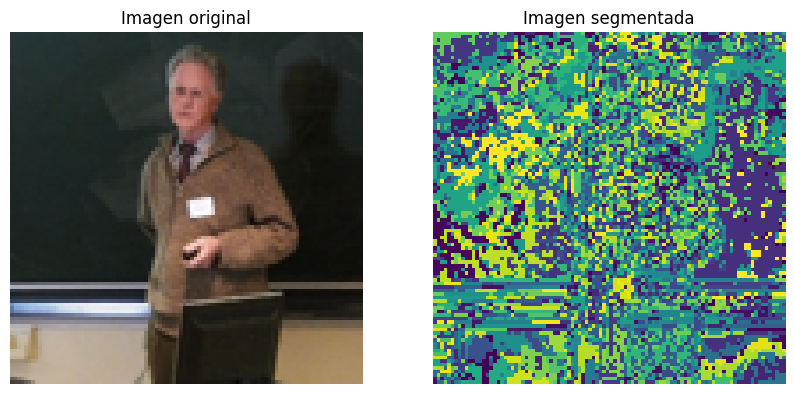

In [6]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from PIL import Image

# 1. Cargar la imagen
image_path = "Dempster_in_Brest.jpeg"  # Cambia esto por la ruta de tu imagen
image = Image.open(image_path).resize((100, 100))  # Redimensionar para hacerlo más rápido
image = np.array(image) / 255.0  # Normalizar los valores de píxeles al rango [0, 1]

# 2. Convertir la imagen a un conjunto de datos
height, width, channels = image.shape
data = image.reshape(-1, channels)  # Aplanar la imagen a una lista de píxeles

# 3. Aplicar Gaussian Mixture Model (GMM) con Algoritmo EM
n_components = 365  # Número de segmentos (por ejemplo, fondo, objeto1, objeto2)
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)  # Entrenar el modelo

# 4. Asignar cada píxel a un segmento
segmented = gmm.predict(data)  # Predecir el segmento para cada píxel
segmented_image = segmented.reshape(height, width)  # Convertir de nuevo a forma de imagen

# 5. Visualizar la imagen original y la segmentada
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(image)
plt.axis("off")

# Imagen segmentada
plt.subplot(1, 2, 2)
plt.title("Imagen segmentada")
plt.imshow(segmented_image, cmap="viridis")
plt.axis("off")

plt.show()